In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import os as os
import random
from model.dynamic_list import DynamicList
from algorithms.algorithms import *

In [3]:
# # testing with n = 100 and t = n^2

# list1 = DynamicList(1,1,1,100)

# list1.reverse_order()

# repeated_insertion_sort(list1, 10000)

# x1 = range(0, len(list1.stats.distances))
# y1 = list1.stats.distances


# list2 = DynamicList(1,1,1,100)
# list2.reverse_order()

# quick_then_insertion_sort(list2, 10000)
# x2 = range(0, len(list2.stats.distances))
# y2 = list2.stats.distances
# assert list2.real == list1.real

# # plot lines
# plt.plot(x1, y1, label = "reapeated_insort")
# plt.plot(x2, y2, label = "quick_then_repeated_insort")
# plt.legend()
# plt.show()

In [4]:
# testing with n = 10 and t = n^2

list1 = DynamicList(1,1,1,100, 1)

list1.reverse_order()

repeated_insertion_sort(list1, 115)

array1 = pd.DataFrame(list1.stats.distances)

# writing to Excel
datatoexcel = pd.ExcelWriter(path = 'experiments/results/test1.xlsx')

# write DataFrame to excel
array1.to_excel(datatoexcel)

# save the excel
datatoexcel.close()




list2 = DynamicList(1,1,1,100,1)
list2.reverse_order()

quick_then_insertion_sort(list2,5000)


array2 = pd.DataFrame(list2.stats.distances)

# writing to Excel
datatoexcel = pd.ExcelWriter(path = 'experiments/results/test2.xlsx')

# write DataFrame to excel
array2.to_excel(datatoexcel)

# save the excel
datatoexcel.close()

# x2 = range(0, len(list2.stats.distances))
# y2 = list2.stats.distances


# # plot lines
# plt.plot(x1, y1, label = "reapeated_insort")
# plt.plot(x2, y2, label = "quick_then_repeated_insort")
# plt.legend()
# plt.show()

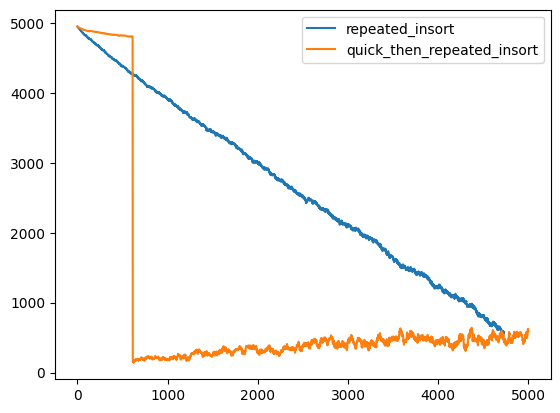

In [5]:
yy1 = pd.read_excel('experiments/results/test1.xlsx',  index_col=0)
yy2 = pd.read_excel('experiments/results/test2.xlsx',  index_col=0)


# plot lines
plt.plot(yy1.index[:5000], yy1.iloc[:5000, 0], label="repeated_insort")
plt.plot(yy2.index[:5000], yy2.iloc[:5000, 0], label="quick_then_repeated_insort")
plt.legend()
plt.show()

In [8]:
algorithm = "rep-quick-rep-insert-1"
temp = algorithm.split("-")
i = temp[len(temp) - 1]
i

'1'

In [12]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
from runner import Runner

def plot_experiment():
    input_sizes = 100 # range(100, 50001, 100)
    algorithms = ["rep-insertion", "quick-rep-insertion", "rep-quick-rep-insertion-1", "rep-quick-rep-insertion-2"]
    configs = ["reverse-sorted"]
    seeds = range(0, 101)
    probe_rates = [1]
    change_rates = [1, 2, 10, 20]

    results = []

    for n in input_sizes:
        for alg in algorithms:
            for con in configs:
                for p in probe_rates:
                    for c in change_rates:
                        for i in seeds:
                            time_limit = math.pow(n, 3)
                            sample_rate = n / 20
                            file_name = f"results/experiment3-{alg}-{n}-{c}-{i}.xlsx"

                            # Run and store
                            cur_run = Runner(i, p, c, alg, n, time_limit, sample_rate, con)
                            cur_run.run()
                            cur_run.store_results(file_name)

                            # Load and label
                            if os.path.exists(file_name):
                                df = pd.read_excel(file_name, index_col=0)  # assume first column is index
                                df = df.iloc[:5000]  # only use first 5000
                                df["algorithm"] = alg
                                df["change_rate"] = c
                                df["input_size"] = n
                                results.append(df)

    # Plot
    if results:
        full_df = pd.concat(results, ignore_index=True)

        plt.figure(figsize=(12, 6))
        for alg in algorithms:
            subset = full_df[full_df["algorithm"] == alg]
            grouped = subset.groupby("input_size").mean(numeric_only=True)
            # Assume the metric is in the first unnamed column
            metric_col = grouped.columns[0]
            plt.plot(grouped.index[:5000], grouped[metric_col][:5000], label=alg)

        plt.title("Algorithm Comparison (First 5000 Values)")
        plt.xlabel("Input Size")
        plt.ylabel("Average Distance")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No results to plot.")
